In [17]:
import pandas as pd
import numpy as np

# Load the dataset

In [18]:
initial_data = pd.read_csv("train.csv")
initial_data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


Inspect some accessible attributes of the data frame

There are 8673 instances in the dataset, but most of them are missing features (e.g. `HomePlanet` feature with only 8492 counts).
Many attributes are typed as object, which means, given the fact that we extract data from a .csv file, that they must be text attributes.

In [19]:
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Let's talk about the elephant in the room, namely the maximum values of all features, except `Age`. In the description of the dataset, we find out that these are the luxury prices for the corresponding services. These unbalanced values might confuse the future predictions, so we may have to do something about them.
Also, the same attributes have the value of 0 in more than 50% of cases.

In [20]:
initial_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Another quick way to get a feel of the type of data is to plot a histogram for each numerical attribute.

We notice that the large values shifted the graphs to the right, pretty far from the mean value of the feature.

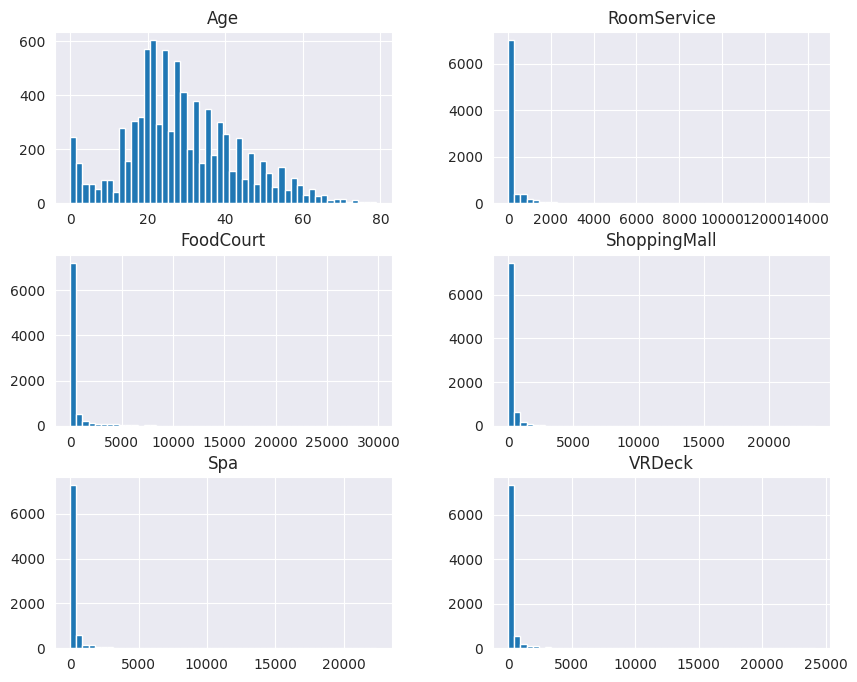

In [21]:
import matplotlib.pyplot as plt

initial_data.hist(bins=50, figsize=(10, 8))
plt.show()

Let's see if we find correlations between features and label. For that, we will use a correlation matrix.

We observe that there are not so many correlations between these features and our label.

Transported     1.000000
FoodCourt       0.046566
ShoppingMall    0.010141
Age            -0.075026
VRDeck         -0.207075
Spa            -0.221131
RoomService    -0.244611
Name: Transported, dtype: float64

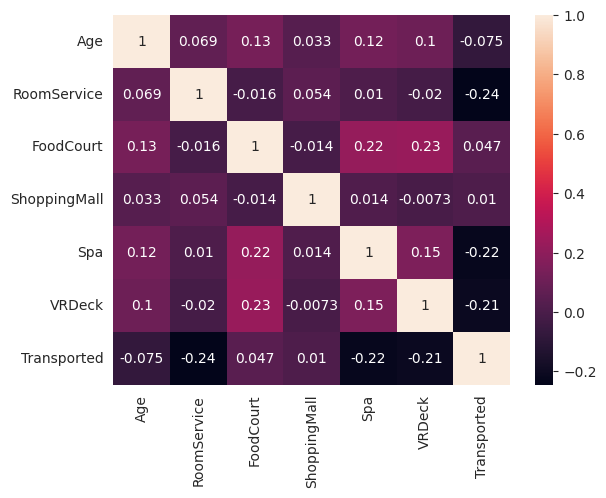

In [22]:
from seaborn import heatmap

corr_matrix = initial_data.corr()
heatmap(corr_matrix, annot=True)
corr_matrix["Transported"].sort_values(ascending=False)

We make pipelines with all data of interest with the purpose of solving some initial issues:
- presence of NaN fields of each feature. We had three options: set the missing values to some value, getting rid of the corresponding entries or getting rid of the whole attribute. Because there were not so many NaN values, we decided to choose the first option for all attributes. Then, because there were more than 50% of the numerical values equal to 0, we decided to fill the missing ones with value 0, choosing the `most_frequent` strategy. Same strategy was chosen for the `object` (string) typed values because we can't define a mean of them. And lastly, it makes sense to choose between 1 and 0 when it comes to boolean values, so we used the same strategy here as well.

- the need for scaling the numerical attributes. Many algorithms do not perform well when the input numerical attributes have very different scales. It's the case of the large numbers encountered in the features that imply prices.

- the need of transforming the `object` typed data into `float64` or `int`. Most of the algorithms do not support other data except numerical, so it is better to transform ours and allowing us to try more regressions or classifications.

- the need to divide the category features, just transformed from `object` type to `float64`, into more columns, so future algorithms will not make correlations between the irrelevant numerical values

At the end of this code cell, we concatenate the transformed columns.

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


num_attribs = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
cat_attribs = ['HomePlanet', 'Destination']
bool_attribs = ['CryoSleep', 'VIP']

# we decide to ignore PassengerId and Cabin because they do not seem to have relevant numerical value

num_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))
bool_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OrdinalEncoder())

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
    ("bool", bool_pipeline, bool_attribs)
])